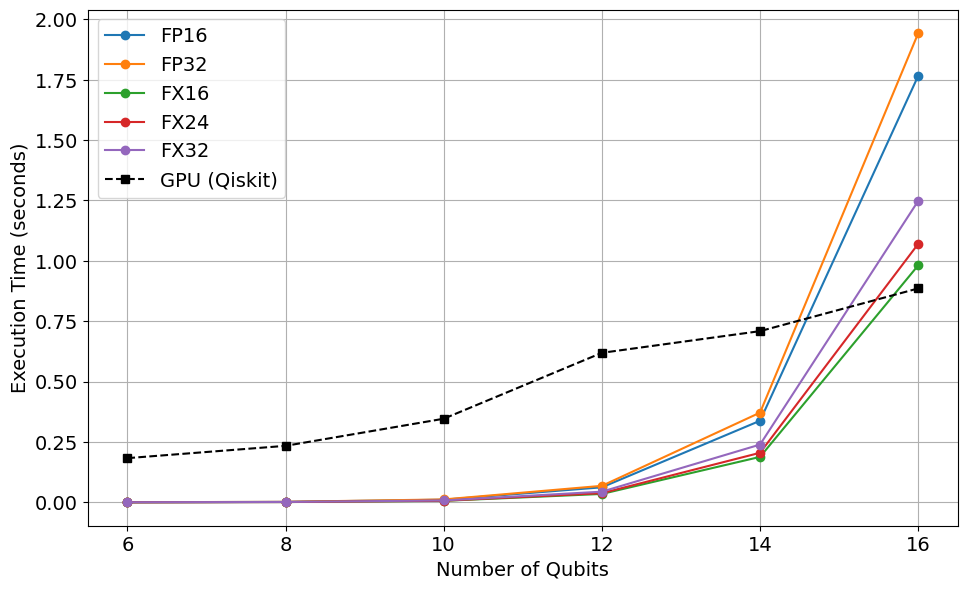

In [ ]:
# https://arxiv.org/pdf/2401.09076
# QFT: data cho 6,8,10,..., 32

import matplotlib.pyplot as plt
import h5py
import os
import numpy as np
# Extract data from HDF5 file
hdf5_data = []
with h5py.File('../cpgpu/qft/data_qft_qiskit_multithread_dp.h5', 'r') as h5_file:
    # Get the data from the HDF5 file for qubits 6, 8, 10, ..., 32
    hdf5_data = h5_file['qiskit'][:]
    # Select the corresponding values for qubits 6, 8, 10, ..., 16
    hdf5_selected_data = hdf5_data[:6]  # Since we only want up to qubits 16

hardware_platforms = ['FP16', 'FP32', 'FX16', 'FX24', 'FX32']

qubits_to_extract = [6, 8, 10, 12, 14, 16]

execution_times = {}

for platform in hardware_platforms:
    path = f"../time/qft/QFT_{platform}_Time.txt"
    times = np.loadtxt(path)
    selected_times = [times[qubit - 3] for qubit in qubits_to_extract]  # Offset by 3 (since index starts at 3 qubits)
    execution_times[platform] = selected_times

for platform, times in execution_times.items():
    plt.plot(qubits_to_extract, times, marker='o', label=f'{platform}')

plt.plot(qubits_to_extract, hdf5_selected_data, marker='s', linestyle='--', label='GPU (Qiskit)', color='black')

# Set chart labels and title
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.legend()
plt.subplots_adjust(left=0.1, right=0.97, top=0.96, bottom=0.1)  # Adjust margins

plt.show()



In [3]:
 # https://arxiv.org/pdf/2401.09076
# RQC: data cho 12,14,..., 32


import matplotlib.pyplot as plt
import h5py
import os
import numpy as np

# Extract data from the QRC HDF5 file
hdf5_data = []
with h5py.File('./cpgpu/qrc/data_rqc_qiskit_singlethread_dp.h5', 'r') as h5_file:
    # Get the data from the HDF5 file for qubits 6, 8, 10, ..., 32
    hdf5_data = h5_file['qiskit'][:]
    # Select the corresponding values for qubits 6, 8, 10, ..., 16
    hdf5_selected_data = hdf5_data[:6]  # Since we only want up to qubits 16

# Path to the directory containing the QRC time data
time_data_path = './time/FPGA_QRC'

# List of hardware platforms
hardware_platforms = ['FP32', 'FX24', 'FX32']

# Number of depths to average across
num_depths = 10

# Qubit values to plot (even qubits from 6 to 16)
qubits_to_extract = [6, 8, 10, 12, 14, 16]

# Dictionary to store averaged execution times for each platform
execution_times = {}

# Loop over each hardware platform
for platform in hardware_platforms:
    platform_times = []  # To store averaged times for each qubit

    # Initialize a list to store cumulative times for each qubit across all depths
    cumulative_times = np.zeros(15)  # 15 because the data is for qubits 3 to 17

    # Loop over each depth (1 to 10)
    for depth in range(1, num_depths + 1):
        file_path = f'{time_data_path}/{platform}/time/{platform}_{depth}_Time.txt'

        if os.path.exists(file_path):
            with open(file_path, 'r') as file:
                # Read all lines (assuming each line corresponds to qubits from 3 to 17)
                all_times = file.readlines()
                
                # Convert lines to a list of floats (each line represents the execution time for a qubit count)
                times = [float(time.strip()) for time in all_times]
                
                # Add these times to the cumulative_times array
                cumulative_times += np.array(times)
        else:
            print(f"File not found: {file_path}")

    # Compute the average time for each qubit across all depths
    avg_times = cumulative_times / num_depths

    # Extract the times for qubits 6, 8, 10, ..., 16
    selected_times = [avg_times[qubit - 3] for qubit in qubits_to_extract]  # Offset by 3 (since index starts at 3 qubits)
    
    # Store the selected times in the dictionary for this platform
    execution_times[platform] = selected_times

# Plot 1: Linear scale (default)
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})  # Increase font size

# Plot the data for each platform
for platform, times in execution_times.items():
    plt.plot(qubits_to_extract, times, marker='o', label=f'{platform}')

# Plot the HDF5 data for comparison
plt.plot(qubits_to_extract, hdf5_selected_data, marker='s', linestyle='--', label='GPU (Qiskit)', color='black')

# Set chart labels and title
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.legend()
plt.subplots_adjust(left=0.1, right=0.97, top=0.96, bottom=0.1)  # Adjust margins

# Save the linear scale plot
plt.savefig('qrc_exe_time_gpu_qiskit_vs_fpga_linear.png')
# Show the linear scale plot
plt.show()

# Plot 2: Logarithmic scale
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})  # Increase font size

# Plot the data for each platform
for platform, times in execution_times.items():
    plt.plot(qubits_to_extract, times, marker='o', label=f'{platform}')

# Plot the HDF5 data for comparison
plt.plot(qubits_to_extract, hdf5_selected_data, marker='s', linestyle='--', label='GPU (Qiskit)', color='black')

# Set chart labels and title
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (seconds)')
plt.yscale('log')  # Set Y-axis to logarithmic scale
plt.grid(True)
plt.legend()
plt.subplots_adjust(left=0.1, right=0.97, top=0.96, bottom=0.1)  # Adjust margins

# Save the log scale plot
plt.savefig('qrc_exe_time_gpu_qiskit_vs_fpga_log.png')
# Show the log scale plot
plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './cpgpu/qrc/data_rqc_qiskit_singlethread_dp.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

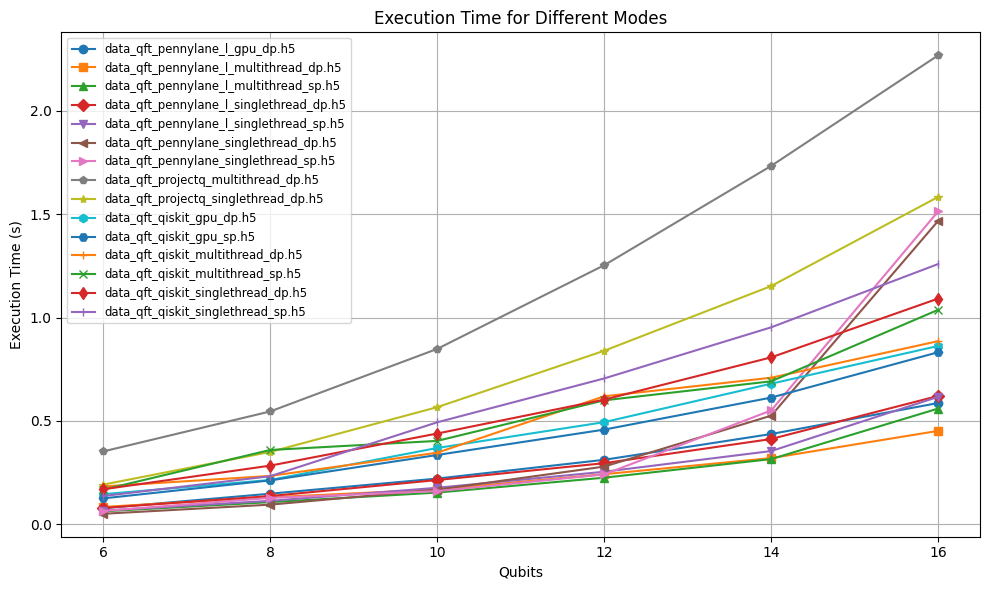

In [2]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing the HDF5 files
directory = './cpgpu/qft/'
files = [
    'data_qft_pennylane_l_gpu_dp.h5',
    'data_qft_pennylane_l_multithread_dp.h5',
    'data_qft_pennylane_l_multithread_sp.h5',
    'data_qft_pennylane_l_singlethread_dp.h5',
    'data_qft_pennylane_l_singlethread_sp.h5',
    'data_qft_pennylane_singlethread_dp.h5',
    'data_qft_pennylane_singlethread_sp.h5',
    'data_qft_projectq_multithread_dp.h5',
    'data_qft_projectq_singlethread_dp.h5',
    'data_qft_qiskit_gpu_dp.h5',
    'data_qft_qiskit_gpu_sp.h5',
    'data_qft_qiskit_multithread_dp.h5',
    'data_qft_qiskit_multithread_sp.h5',
    'data_qft_qiskit_singlethread_dp.h5',
    'data_qft_qiskit_singlethread_sp.h5'
]

# Initialize a dictionary to store execution times
execution_times = {}

# Mapping of file names to the correct object name in HDF5
object_map = {
    'pennylane_l': ['data_qft_pennylane_l_gpu_dp.h5',
                    'data_qft_pennylane_l_multithread_dp.h5',
                    'data_qft_pennylane_l_multithread_sp.h5',
                    'data_qft_pennylane_l_singlethread_dp.h5',
                    'data_qft_pennylane_l_singlethread_sp.h5'],
    'pennylane': ['data_qft_pennylane_singlethread_dp.h5',
                  'data_qft_pennylane_singlethread_sp.h5'],
    'projectq': ['data_qft_projectq_multithread_dp.h5',
                 'data_qft_projectq_singlethread_dp.h5'],
    'qiskit': ['data_qft_qiskit_gpu_dp.h5',
               'data_qft_qiskit_gpu_sp.h5',
               'data_qft_qiskit_multithread_dp.h5',
               'data_qft_qiskit_multithread_sp.h5',
               'data_qft_qiskit_singlethread_dp.h5',
               'data_qft_qiskit_singlethread_sp.h5']
}

# Define different markers to distinguish each mode
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd', '|']
marker_idx = 0

# Extract the execution times for each file
for file_name in files:
    file_path = os.path.join(directory, file_name)
    
    # Check if file exists before attempting to open it
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip to the next file
    
    # Identify the correct object (pennylane, pennylane_l, projectq, qiskit) based on the file name
    object_name = None
    for key, file_list in object_map.items():
        if file_name in file_list:
            object_name = key
            break
    
    if object_name is None:
        print(f"Unknown object for file: {file_name}")
        continue
    
    try:
        with h5py.File(file_path, 'r') as h5_file:
            # Access the correct object (pennylane, pennylane_l, projectq, or qiskit)
            execution_time = h5_file[object_name][:]
            # Store the times in a dictionary for this mode
            execution_times[file_name] = execution_time
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        continue

# Check if any data was loaded
if len(execution_times) == 0:
    print("No execution times were loaded. Please check the file paths or object names.")
else:
    # Plot the execution times
    plt.figure(figsize=(10, 6))

    # Define the x-axis values (qubits: 6, 8, 10, ..., 16)
    qubits = [6, 8, 10, 12, 14, 16]

    # Plot each mode with a unique marker
    for mode, times in execution_times.items():
        plt.plot(qubits, times[:6], label=mode, marker=markers[marker_idx % len(markers)])
        marker_idx += 1

    # Add labels and title
    plt.xlabel('Qubits')
    plt.ylabel('Execution Time (s)')
    plt.title('Execution Time for Different Modes')
    plt.legend(loc='best', fontsize='small')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()
